### **lab 11 tasks**
#### **ibrahim johar - 23K-0074**

- **Gaussian Naive Bayes**

    - Used when features are continuous

    - Values assumed to follow a normal distribution

- **Multinomial Naive Bayes**

    - Used for text → word counts

    - Works with Bag of Words or TF-IDF

    - Best for: spam/ham, sentiment analysis, topic classification

- **Bernoulli Naive Bayes**

    - Features are 0/1 (word present or not)

    - Good when presence matters more than frequency

1. **Text Cleaning**
- lowercase
- remove punctuation
- remove numbers/special chars
2. **Tokenization**
- **sentence tokenization** -> breaks text into sentences
- **word tokenization** -> breaks sentences into words
- **character tokenization** -> breaks into characters
3. **Stopword Removal**
- Stopwords = common words that don’t add meaning
- Examples: “the”, “is”, “and”, “a”
- Helps reduce noise.
4. **Stemming**
- Reduces a word to its root form
- Often produces non-dictionary roots
- Example: "playing", "played" → "play"
5. **Lemmatization**
- Returns the actual dictionary form (lemma)
    Example:
- "better" → "good"
- "playing" → "play"
- More accurate than stemming.
6. **Vectorization (converting text->numbers)**
- **bag of words**
    - counts how many times each word appears
- **rf-idf (better)**
    - counts word frequency
    - down-weights common words
    - up-weights rare meaningful words

#### **task 01**

In [3]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ibrah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [6]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns.tolist()

['Category', 'Message']

In [8]:
def preprocess(text):
    test = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', '', text).strip()
    return text

In [9]:
df['clean'] = df['Message'].apply(preprocess)

In [10]:
X = df['clean']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
vect = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=2)
X_train_acc = vect.fit_transform(X_train)
X_test_acc = vect.transform(X_test)

In [12]:
model = MultinomialNB()
model.fit(X_train_acc, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [13]:
y_pred = model.predict(X_test_acc)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8699551569506726

Classification Report:
               precision    recall  f1-score   support

         ham       0.87      1.00      0.93       966
        spam       1.00      0.03      0.05       149

    accuracy                           0.87      1115
   macro avg       0.93      0.51      0.49      1115
weighted avg       0.89      0.87      0.81      1115


Confusion Matrix:
 [[966   0]
 [145   4]]


<Axes: >

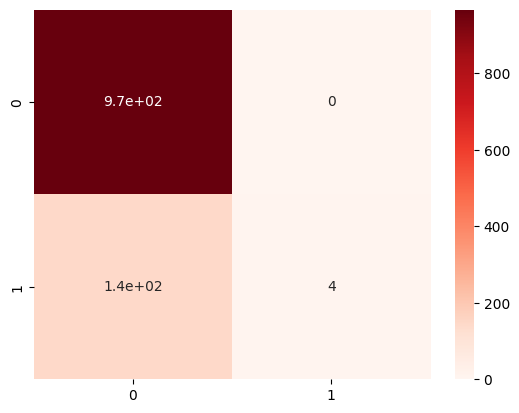

In [14]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds')

In [15]:
def pred_email(text):
    text = preprocess(text)
    vec = vect.transform([text])
    pred = model.predict(vec)[0]
    
    return pred

In [16]:
sample = ["free entry in 2 wkly!!!",
          "hey! can we meet at 10pm tomorrow?"]

for email in sample:
    print(f"\nemail: {email} \nPredict: {pred_email(email)}")


email: free entry in 2 wkly!!! 
Predict: ham

email: hey! can we meet at 10pm tomorrow? 
Predict: ham


In [17]:
print(df['Category'].value_counts())

Category
ham     4825
spam     747
Name: count, dtype: int64


#### **task 02**

In [19]:
df2 = pd.read_csv("Reviews.csv")
df2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [20]:
df2.columns.tolist()

['Id',
 'ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text']

In [21]:
def preprocess2(text):
  text = text.lower()
  text = re.sub(r'\S+@\S+','',text)
  text = re.sub(r"http\S+|www\S+|https\S+", '', text)
  text = re.sub(r'\d+','',text)
  text = re.sub(r'[^\w\s]','',text)
  text = re.sub(r'\s+','',text).strip()
  return text

In [22]:
df2['new'] = df2['Text'].apply(preprocess2)

In [23]:
X = df2['new']
y = df2['Score']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
vect = TfidfVectorizer(stop_words='english',max_df=0.9,min_df=2)
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

In [25]:
mod = MultinomialNB()
mod.fit(X_train_vect, y_train)
y_pred = mod.predict(X_test_vect)

In [26]:
print("accuracy score : ",accuracy_score(y_test,y_pred))
print('\nclassification report: \n',classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

accuracy score :  0.7354232085213429

classification report: 
               precision    recall  f1-score   support

           1       1.00      0.30      0.46     10326
           2       1.00      0.16      0.28      5855
           3       1.00      0.22      0.36      8485
           4       1.00      0.30      0.46     16123
           5       0.71      1.00      0.83     72902

    accuracy                           0.74    113691
   macro avg       0.94      0.40      0.48    113691
weighted avg       0.81      0.74      0.68    113691


Confusion Matrix:
 [[ 3098     0     0     0  7228]
 [    0   964     1     1  4889]
 [    0     0  1867     2  6616]
 [    0     0     0  4781 11342]
 [    0     1     0     0 72901]]


In [27]:
def predict_score(text):
    text = preprocess2(text)
    vec = vect.transform([text])
    pred = mod.predict(vec)[0]
    return pred

In [28]:
pred = predict_score('I like')

print(pred)

if pred > 3:
    print('Best')
elif pred > 2:
    print('Average')
else:
    print("Below Avg")

5
Best
